<a href="https://colab.research.google.com/github/Shikha18Shukla/Machine_Learning_repo/blob/main/ML_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 3 : Implement Logistic Regression on Titanic dataset to predict survival using Pclass, Age, Sex. Evaluate with confusion matrix and ROC curve.**

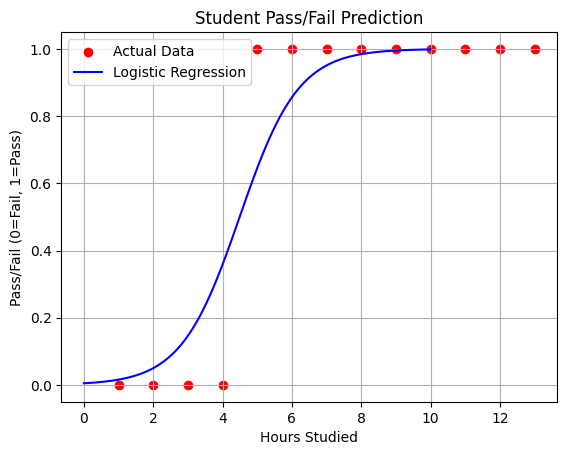

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13]).reshape(-1, 1)
results = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1,1,1,1,1])

model = LogisticRegression()
model.fit(hours, results)

x_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(x_test)[:, 1]

plt.scatter(hours, results, color="red", label="Actual Data")
plt.plot(x_test, y_prob, color="blue", label="Logistic Regression")

plt.xlabel("Hours Studied")
plt.ylabel("Pass/Fail (0=Fail, 1=Pass)")
plt.title("Student Pass/Fail Prediction")
plt.legend()
plt.grid(True)
plt.show()


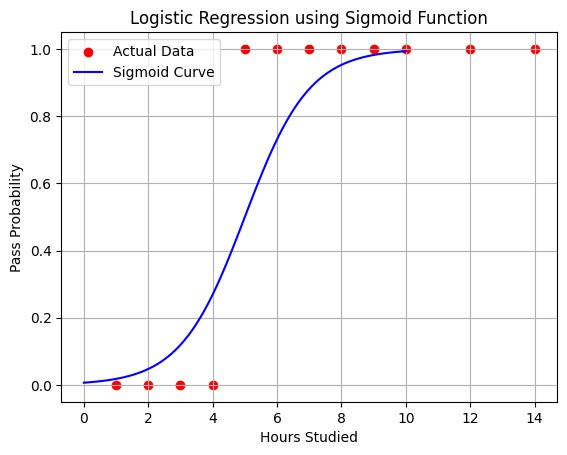

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

hours = np.array([1,2,3,4,5,6,7,8,9,10,12,14])
results = np.array([0,0,0,0,1,1,1,1,1,1,1,1])

w, b = 1, -5

z = w * hours + b
y_pred = sigmoid(z)

plt.scatter(hours, results, color="red", label="Actual Data")

x_test = np.linspace(0, 10, 100)
y_sigmoid = sigmoid(w * x_test + b)
plt.plot(x_test, y_sigmoid, color="blue", label="Sigmoid Curve")

plt.xlabel("Hours Studied")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression using Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()


 Logistic Regression on  USA housing dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = {
    "study_hours": [2, 4, 6, 8, 10, 1, 3, 7, 5, 9],
    "attendance": [60, 70, 80, 90, 95, 50, 65, 85, 75, 92],
    "previous_marks": [40, 55, 65, 75, 85, 30, 50, 70, 60, 80],
    "pass_fail": [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[["study_hours", "attendance", "previous_marks"]]
y = df["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

new_student = [[7, 88, 72]]
prediction = model.predict(new_student)
print("Prediction for new student (1=Pass, 0=Fail):", prediction[0])



Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Prediction for new student (1=Pass, 0=Fail): 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


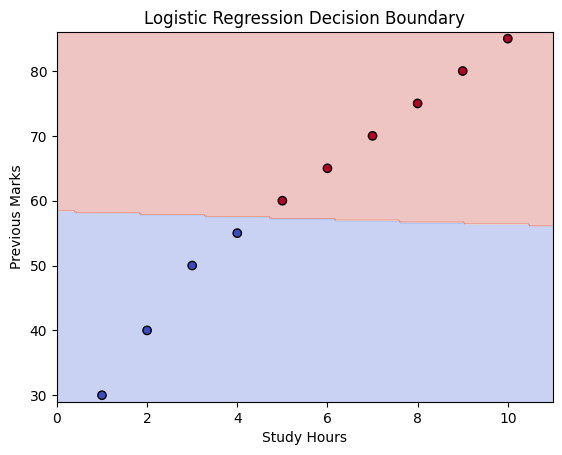

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


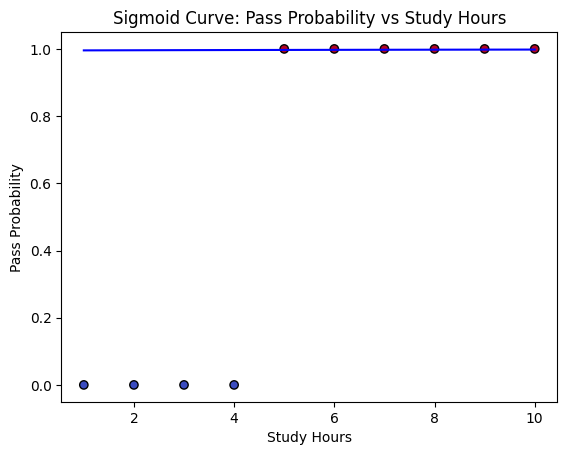

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = {
    "study_hours": [2, 4, 6, 8, 10, 1, 3, 7, 5, 9],
    "attendance": [60, 70, 80, 90, 95, 50, 65, 85, 75, 92],
    "previous_marks": [40, 55, 65, 75, 85, 30, 50, 70, 60, 80],
    "pass_fail": [0, 0, 1, 1, 1, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[["study_hours", "previous_marks"]]
y = df["pass_fail"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

x_min, x_max = X["study_hours"].min() - 1, X["study_hours"].max() + 1
y_min, y_max = X["previous_marks"].min() - 1, X["previous_marks"].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X["study_hours"], X["previous_marks"], c=y, edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Study Hours")
plt.ylabel("Previous Marks")
plt.title("Logistic Regression Decision Boundary")
plt.show()

study_range = np.linspace(1, 10, 100).reshape(-1, 1)
fixed_marks = np.full((100, 1), 70)
X_range = np.hstack((study_range, fixed_marks))
probs = model.predict_proba(X_range)[:, 1]

plt.plot(study_range, probs, color="blue")
plt.scatter(X["study_hours"], y, c=y, cmap=plt.cm.coolwarm, edgecolor="k")
plt.xlabel("Study Hours")
plt.ylabel("Pass Probability")
plt.title("Sigmoid Curve: Pass Probability vs Study Hours")
plt.show()
